In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# --- 1) Cargar el dataset ---
df = pd.read_csv("admitidos_prepa.csv")

print("✅ Dataset cargado correctamente")
print(f"Registros: {df.shape[0]}, Columnas: {df.shape[1]}")

✅ Dataset cargado correctamente
Registros: 10318, Columnas: 90


In [ ]:
# === 2. Información general ===
print("=== Información del dataset ===")
print(df.info())
print("\nNúmero de filas y columnas:", df.shape)

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10318 entries, 0 to 10317
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             10318 non-null  object 
 1   PERIODO                           10318 non-null  object 
 2   CAMPUS_UTILIZADO                  10318 non-null  object 
 3   SEDE                              10318 non-null  object 
 4   NACIONALIDAD                      10317 non-null  object 
 5   CLAVE_GENERO                      10317 non-null  object 
 6   DESC_NIVEL_ACAD_SOLICITANTE       10318 non-null  object 
 7   CLAVE_TIPO_ADMISION_TIPO_INGRESO  10318 non-null  object 
 8   AREA                              10318 non-null  object 
 9   CLAVE_MAJOR_PGMA_ACAD             10318 non-null  object 
 10  CLAVE_ESCUELA                     10307 non-null  object 
 11  NOMBRE_ESCUELA                    1

In [ ]:
# === 3. Valores faltantes ===
print("\n=== Valores faltantes ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Valores_faltantes': missing, 'Porcentaje': missing_percent})
print(missing_table[missing_table['Valores_faltantes'] > 0].sort_values('Porcentaje', ascending=False))


=== Valores faltantes ===
                               Valores_faltantes  Porcentaje
APORTACION_CAMPUS_TEC                      10318  100.000000
FECHA_SOLICITUD_ADMISION                    6198   60.069781
CAMPUS_APORTACION                            894    8.664470
ENSAYO                                       514    4.981586
RUBRICA                                      514    4.981586
...                                          ...         ...
EDAD                                           1    0.009692
V_DECISION_FINAL1                              1    0.009692
CLAVE_DECISION_ADMISION_FINAL                  1    0.009692
FECHA_DECISION_ADMISION_FINAL                  1    0.009692
NACIONALIDAD                                   1    0.009692

[67 rows x 2 columns]


In [ ]:
# === 4. Estadísticas descriptivas numéricas ===
print("\n=== Estadísticas descriptivas (numéricas) ===")
print(df.describe().T)


=== Estadísticas descriptivas (numéricas) ===
                       count         mean         std  min     25%     50%  \
V_PROM_IND           10318.0    91.430108    5.571694  0.0    87.5    92.0   
V_PAA_IND            10318.0  1093.382535  195.673992  0.0  1010.0  1108.0   
SOLICITUD_INICIADA   10318.0     1.000000    0.000000  1.0     1.0     1.0   
V_PROSPECTO          10318.0     1.000000    0.000000  1.0     1.0     1.0   
V_SOLICITANTE        10318.0     1.000000    0.000000  1.0     1.0     1.0   
...                      ...          ...         ...  ...     ...     ...   
COMITE_NACIONAL_LDM  10303.0     0.000000    0.000000  0.0     0.0     0.0   
V_BECABTE            10303.0     0.014074    0.117800  0.0     0.0     0.0   
V_ANY_BECA           10303.0     0.075124    0.263604  0.0     0.0     0.0   
PRC_BECA_F           10303.0     0.027157    0.114974  0.0     0.0     0.0   
PRC_CREDITO_F        10303.0     0.000000    0.000000  0.0     0.0     0.0   

                

In [ ]:
# === 5. Estadísticas descriptivas categóricas ===
print("\n=== Estadísticas descriptivas (categóricas) ===")
cat_cols = df.select_dtypes(include=['object']).columns
print(df[cat_cols].describe().T)


=== Estadísticas descriptivas (categóricas) ===
                                  count unique  \
FECHA                             10318      1   
PERIODO                           10318      1   
CAMPUS_UTILIZADO                  10318     27   
SEDE                              10318     31   
NACIONALIDAD                      10317     29   
CLAVE_GENERO                      10317      2   
DESC_NIVEL_ACAD_SOLICITANTE       10318      1   
CLAVE_TIPO_ADMISION_TIPO_INGRESO  10318      2   
AREA                              10318      3   
CLAVE_MAJOR_PGMA_ACAD             10318      3   
CLAVE_ESCUELA                     10307   1860   
NOMBRE_ESCUELA                    10310   1753   
DESC_CIUDAD_ESCUELA               10081    312   
DESC_MUNICIPIO_ESCUELA            10081    243   
DESC_ESTADO_ESCUELA               10080     44   
DESC_PAIS_ESCUELA                 10205     24   
V_TEC_NO_TEC                      10318      2   
FECHA_SOLICITUD_ADMISION           4120     96   
F

In [ ]:
# === 6. Revisar valores únicos (cardinalidad) de variables categóricas ===
print("\n=== Cardinalidad de variables categóricas ===")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")


=== Cardinalidad de variables categóricas ===
FECHA: 1 valores únicos
PERIODO: 1 valores únicos
CAMPUS_UTILIZADO: 27 valores únicos
SEDE: 31 valores únicos
NACIONALIDAD: 29 valores únicos
CLAVE_GENERO: 2 valores únicos
DESC_NIVEL_ACAD_SOLICITANTE: 1 valores únicos
CLAVE_TIPO_ADMISION_TIPO_INGRESO: 2 valores únicos
AREA: 3 valores únicos
CLAVE_MAJOR_PGMA_ACAD: 3 valores únicos
CLAVE_ESCUELA: 1860 valores únicos
NOMBRE_ESCUELA: 1753 valores únicos
DESC_CIUDAD_ESCUELA: 312 valores únicos
DESC_MUNICIPIO_ESCUELA: 243 valores únicos
DESC_ESTADO_ESCUELA: 44 valores únicos
DESC_PAIS_ESCUELA: 24 valores únicos
V_TEC_NO_TEC: 2 valores únicos
FECHA_SOLICITUD_ADMISION: 96 valores únicos
FECHA_DECISION_ADMISION_FINAL: 123 valores únicos
PERFIL: 6 valores únicos
CLAVE_DECISION_ADMISION_FINAL: 1 valores únicos
V_DECISION_FINAL1: 1 valores únicos
CAMPUS_APORTACION: 30 valores únicos
ORIGEN_DE_LA_SOLICITUD: 6 valores únicos
DISCIPLINA: 4 valores únicos
TIPO_BECA_F: 4 valores únicos
matricula: 10318 va

In [ ]:
# Buscar columnas con un solo valor único
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas que aún son constantes:", const_cols)

# Buscar columnas donde todos los valores son distintos
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]

print("Columnas con todos los valores únicos:")
print(unique_cols)
print(f"Total: {len(unique_cols)}")


Columnas que aún son constantes: ['FECHA', 'PERIODO', 'DESC_NIVEL_ACAD_SOLICITANTE', 'SOLICITUD_INICIADA', 'V_PROSPECTO', 'V_SOLICITANTE', 'V_ADMITIDO', 'V_RECHAZADO', 'PENDIENTE_DE_DECISION', 'CLAVE_DECISION_ADMISION_FINAL', 'V_DECISION_FINAL1', 'V_PLDM', 'ComiteNacional_LDM', 'V_GAN_LDM', 'BECA_LDM', 'CREDITO_SOAF', 'V_GANADORBTA', 'BECABTA', 'V_POSBCRE', 'V_GAN_BTC', 'BECA_BTC', 'V_POSBEM', 'V_GAN_BEM', 'BECA_BTEM', 'V_SOL_PERFIL_BTEM', 'V_SOL_PERFIL_BTA', 'V_SOL_PERFIL_BTC', 'V_SOL_PERFILES', 'V_PERFILES', 'BECA_PERFILES', 'V_POSBTT', 'V_GAN_BTT', 'BECA_BTT', 'V_GAN_STEAM', 'BECA_STEAM', 'V_BTA', 'V_LDM', 'prcCredito_f', 'COMITE_NACIONAL_LDM', 'PRC_CREDITO_F', 'NIVEL_N']
Columnas con todos los valores únicos:
['matricula']
Total: 1


In [ ]:
# Lista de columnas constantes a eliminar
const_cols = [
    'SOLICITUD_INICIADA', 'V_PROSPECTO', 'V_SOLICITANTE', 'V_ADMITIDO', 'V_RECHAZADO',
    'PENDIENTE_DE_DECISION', 'V_PLDM', 'ComiteNacional_LDM', 'V_GAN_LDM', 'BECA_LDM',
    'CREDITO_SOAF', 'V_GANADORBTA', 'BECABTA', 'V_POSBCRE', 'V_GAN_BTC', 'BECA_BTC',
    'V_POSBEM', 'V_GAN_BEM', 'BECA_BTEM', 'V_SOL_PERFIL_BTEM', 'V_SOL_PERFIL_BTA',
    'V_SOL_PERFIL_BTC', 'V_SOL_PERFILES', 'V_PERFILES', 'BECA_PERFILES', 'V_POSBTT',
    'V_GAN_BTT', 'BECA_BTT', 'V_GAN_STEAM', 'BECA_STEAM', 'V_BTA', 'V_LDM',
    'prcCredito_f', 'COMITE_NACIONAL_LDM', 'PRC_CREDITO_F', 'ORIGEN_N'
]

# Eliminar del DataFrame
df = df.drop(columns=[c for c in const_cols if c in df.columns], errors='ignore')

print("Columnas constantes eliminadas correctamente.")
print("Dimensiones actuales del dataset:", df.shape)


Columnas constantes eliminadas correctamente.
Dimensiones actuales del dataset: (10318, 47)


In [ ]:
# Revisar las columnas que quedan
print("Columnas restantes después de la limpieza:")
print(df.columns.tolist())

# --- AGRUPAR VARIABLES POR TEMÁTICA ---
academic_cols = [col for col in df.columns if col in [
    'V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV'
]]

beca_cols = [col for col in df.columns if 'BECA' in col or 'CREDITO' in col or 'prcBeca' in col or 'PRC_BECA' in col]

origin_cols = [col for col in df.columns if col in [
    'NACIONALIDAD', 'CLAVE_GENERO', 'EDAD', 'ORIGEN_DE_LA_SOLICITUD', 'ORIGEN_N'
]]

campus_cols = [col for col in df.columns if col in [
    'CAMPUS_UTILIZADO', 'SEDE', 'AREA', 'CAMPUS_APORTACION'
]]

target_col = ['INSCRITO'] if 'INSCRITO' in df.columns else []

# Mostrar resumen de clasificación
print("\n--- Variables académicas ---")
print(academic_cols)
print("\n--- Variables socioeconómicas / becas ---")
print(beca_cols)
print("\n--- Variables de origen / demográficas ---")
print(origin_cols)
print("\n--- Variables institucionales ---")
print(campus_cols)
print("\n--- Variable objetivo ---")
print(target_col)

Columnas restantes después de la limpieza:
['CAMPUS_UTILIZADO', 'SEDE', 'NACIONALIDAD', 'CLAVE_GENERO', 'CLAVE_TIPO_ADMISION_TIPO_INGRESO', 'AREA', 'CLAVE_MAJOR_PGMA_ACAD', 'CLAVE_ESCUELA', 'NOMBRE_ESCUELA', 'DESC_CIUDAD_ESCUELA', 'DESC_MUNICIPIO_ESCUELA', 'DESC_ESTADO_ESCUELA', 'DESC_PAIS_ESCUELA', 'V_PROM_IND', 'V_PAA_IND', 'V_TEC_NO_TEC', 'FECHA_SOLICITUD_ADMISION', 'FECHA_DECISION_ADMISION_FINAL', 'PERFIL', 'IPP', 'INSCRITO', 'CAMPUS_APORTACION', 'APORTACION_CAMPUS_TEC', 'EDAD', 'ORIGEN_DE_LA_SOLICITUD', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV', 'V_SOL_BSE', 'BECA_SOAF', 'V_POSTDTA', 'V_POSTULADOBTE', 'v_becadobte', 'BECABTE', 'DISCIPLINA', 'BECA_BHP', 'V_POSSTEAM', 'V_BHP', 'V_BSE', 'v_anybeca', 'POST_ANYBECA', 'prcBeca_f', 'TIPO_BECA_F', 'V_BECABTE', 'V_ANY_BECA', 'PRC_BECA_F']

--- Variables académicas ---
['V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV']

--- Variables socioeconómicas / becas ---
['BECA_SOAF', 'BECABTE', 'BECA_BHP', 'POST_ANYBECA', 'prcBeca_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Distribución de INSCRITO:
INSCRITO
1    81.672805
0    18.327195
Name: proportion, dtype: float64


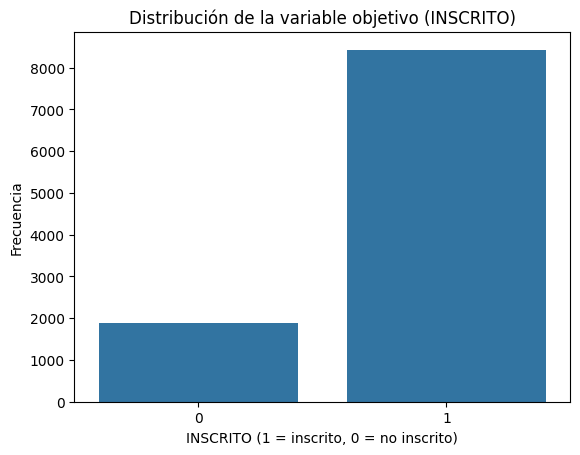

In [ ]:
# =====================
# 1. Variable objetivo
# =====================
print("Distribución de INSCRITO:")
print(df['INSCRITO'].value_counts(normalize=True) * 100)

sns.countplot(x='INSCRITO', data=df)
plt.title("Distribución de la variable objetivo (INSCRITO)")
plt.xlabel("INSCRITO (1 = inscrito, 0 = no inscrito)")
plt.ylabel("Frecuencia")
plt.show()


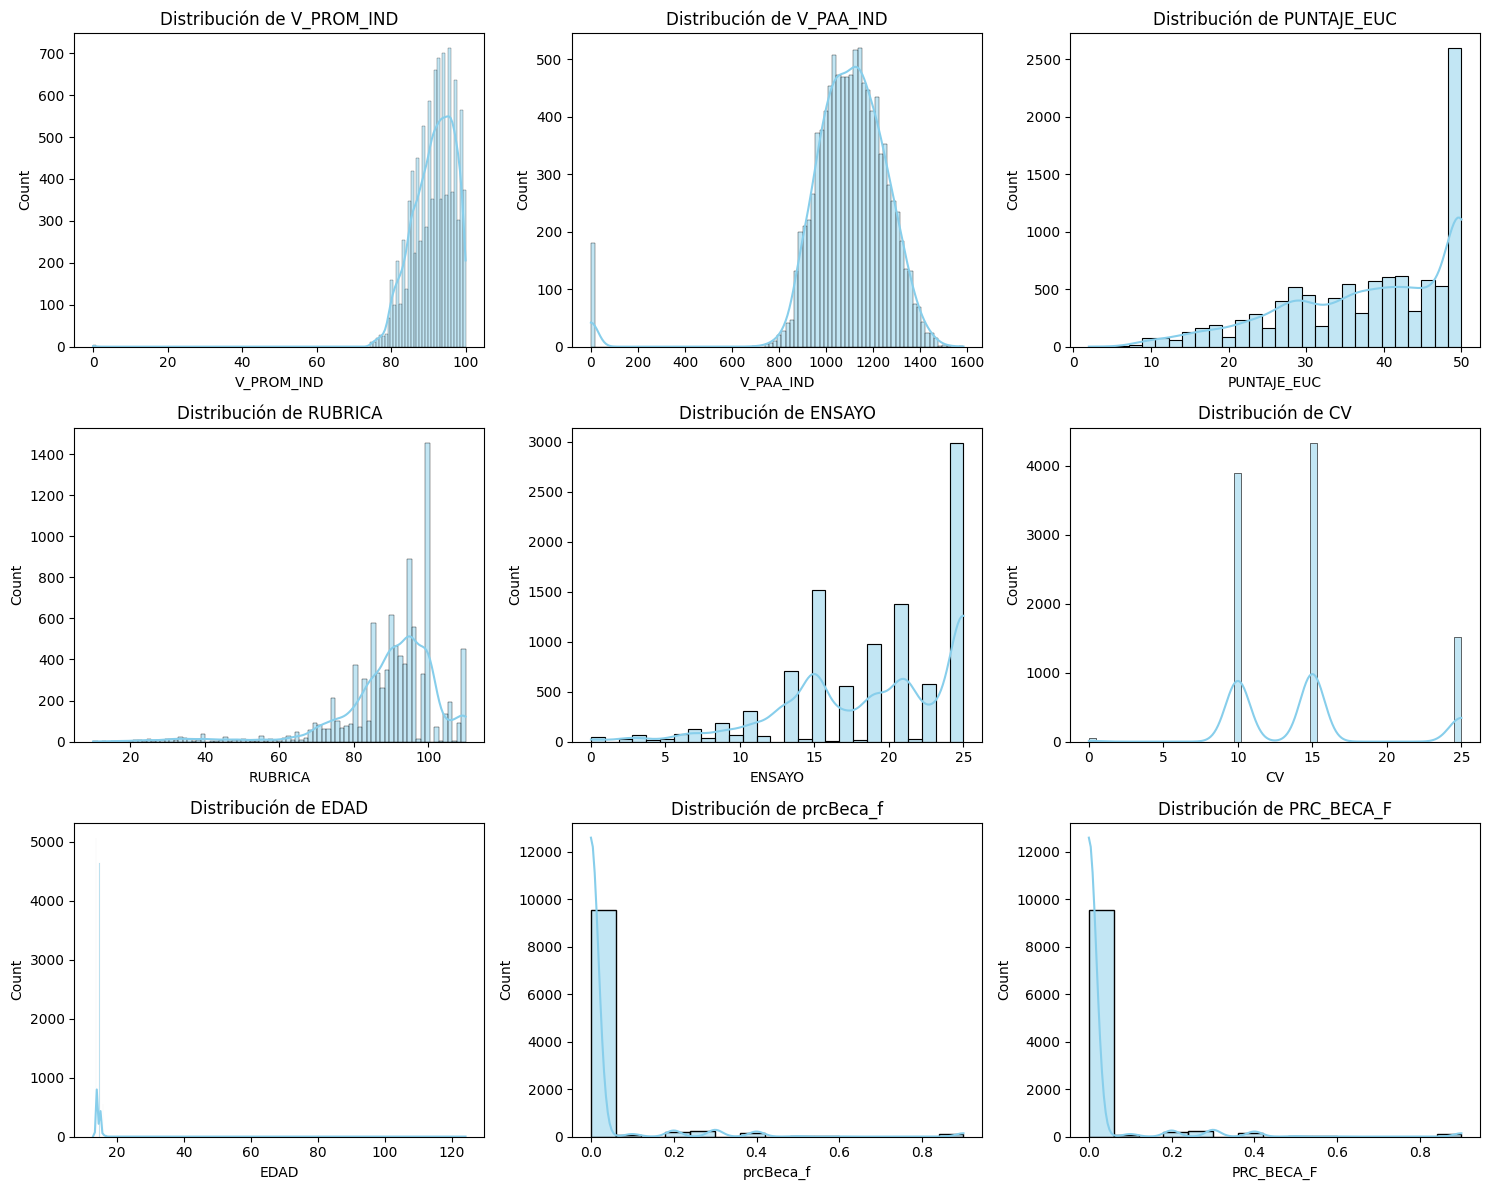

In [ ]:
# =====================
# Variables numéricas
# =====================
num_cols = ['V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV', 'EDAD', 'prcBeca_f', 'PRC_BECA_F']

# --- 1. Histogramas con KDE ---
n = len(num_cols)
cols = 3  # número de columnas por fila
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribución de {col}")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

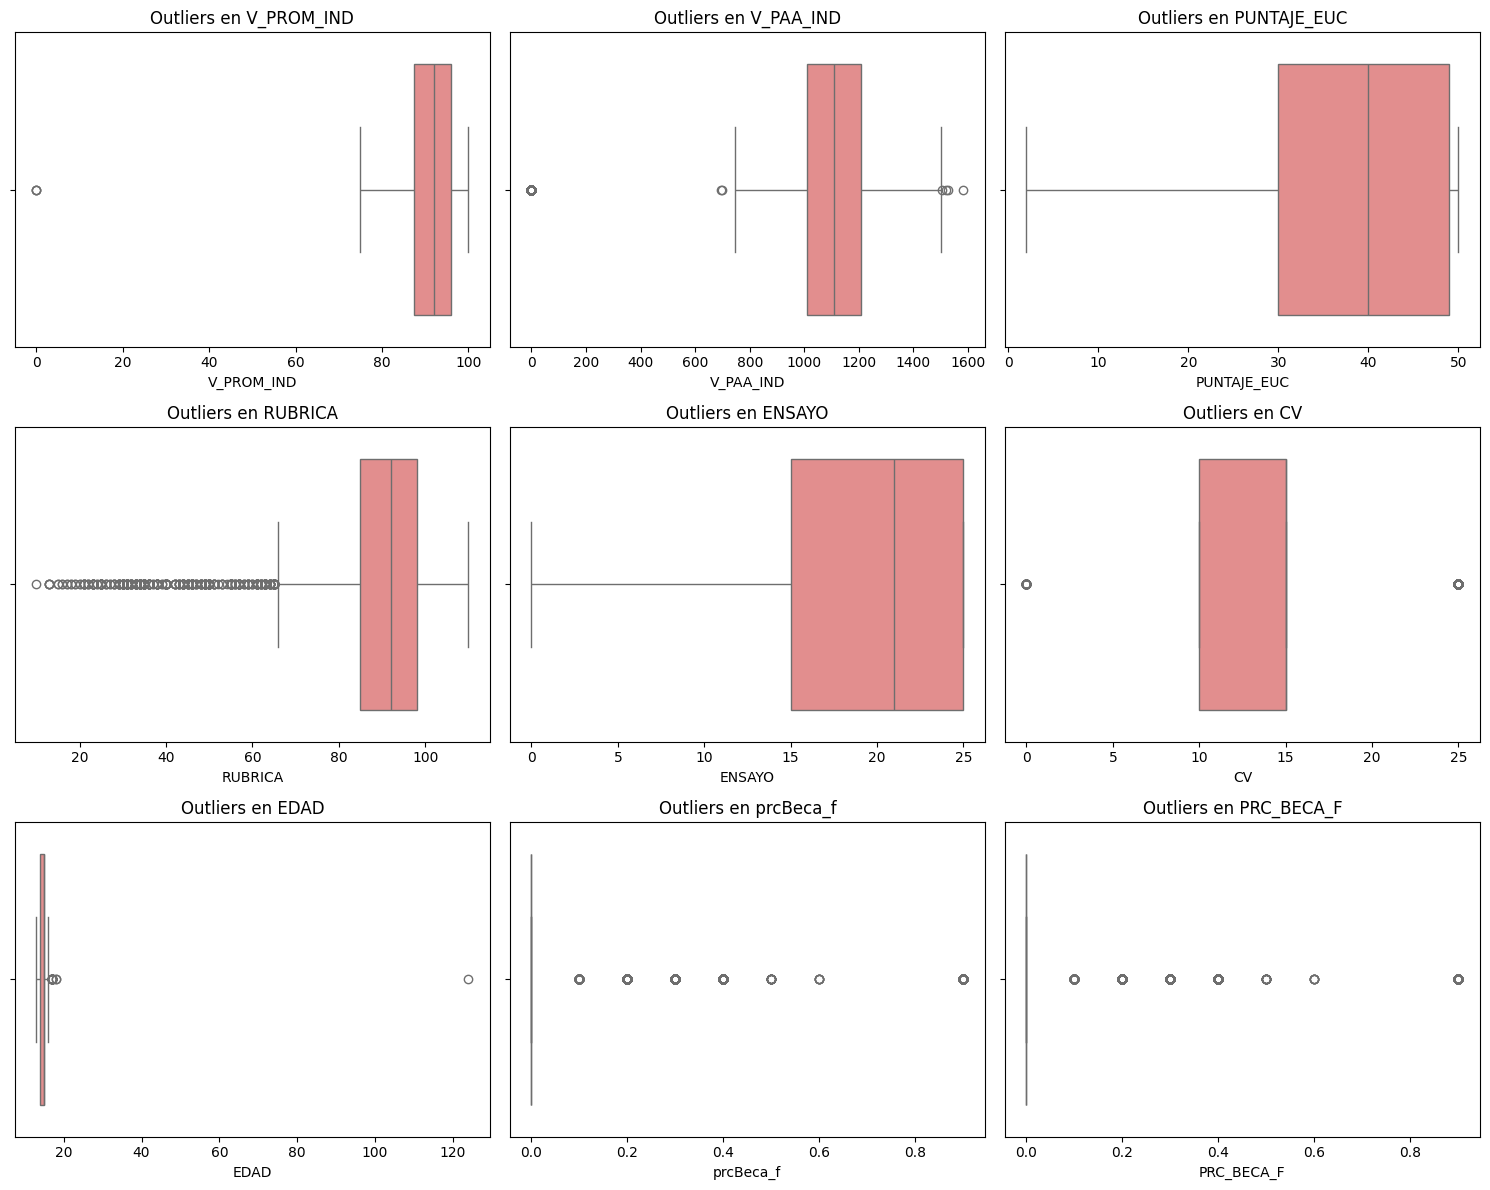

In [ ]:
# --- 2. Boxplots ---
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
        axes[i].set_title(f"Outliers en {col}")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


=== Correlaciones con INSCRITO ===
INSCRITO       1.000000
V_PAA_IND      0.109808
prcBeca_f      0.100514
PRC_BECA_F     0.100514
PUNTAJE_EUC    0.098856
RUBRICA        0.067408
ENSAYO         0.054727
V_PROM_IND     0.051942
CV            -0.004238
EDAD          -0.021345
Name: INSCRITO, dtype: float64


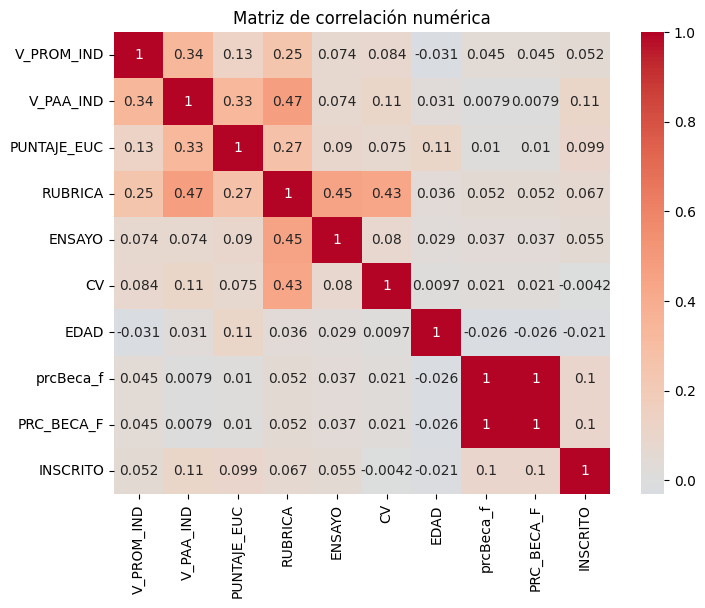

In [ ]:
# =====================
# 4. Correlaciones numéricas con INSCRITO
# =====================
corr = df[num_cols + ['INSCRITO']].corr()
print("\n=== Correlaciones con INSCRITO ===")
print(corr['INSCRITO'].sort_values(ascending=False))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación numérica")
plt.show()

/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_37298/4229015507.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_37298/4229015507.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_37298/4229015507.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=co

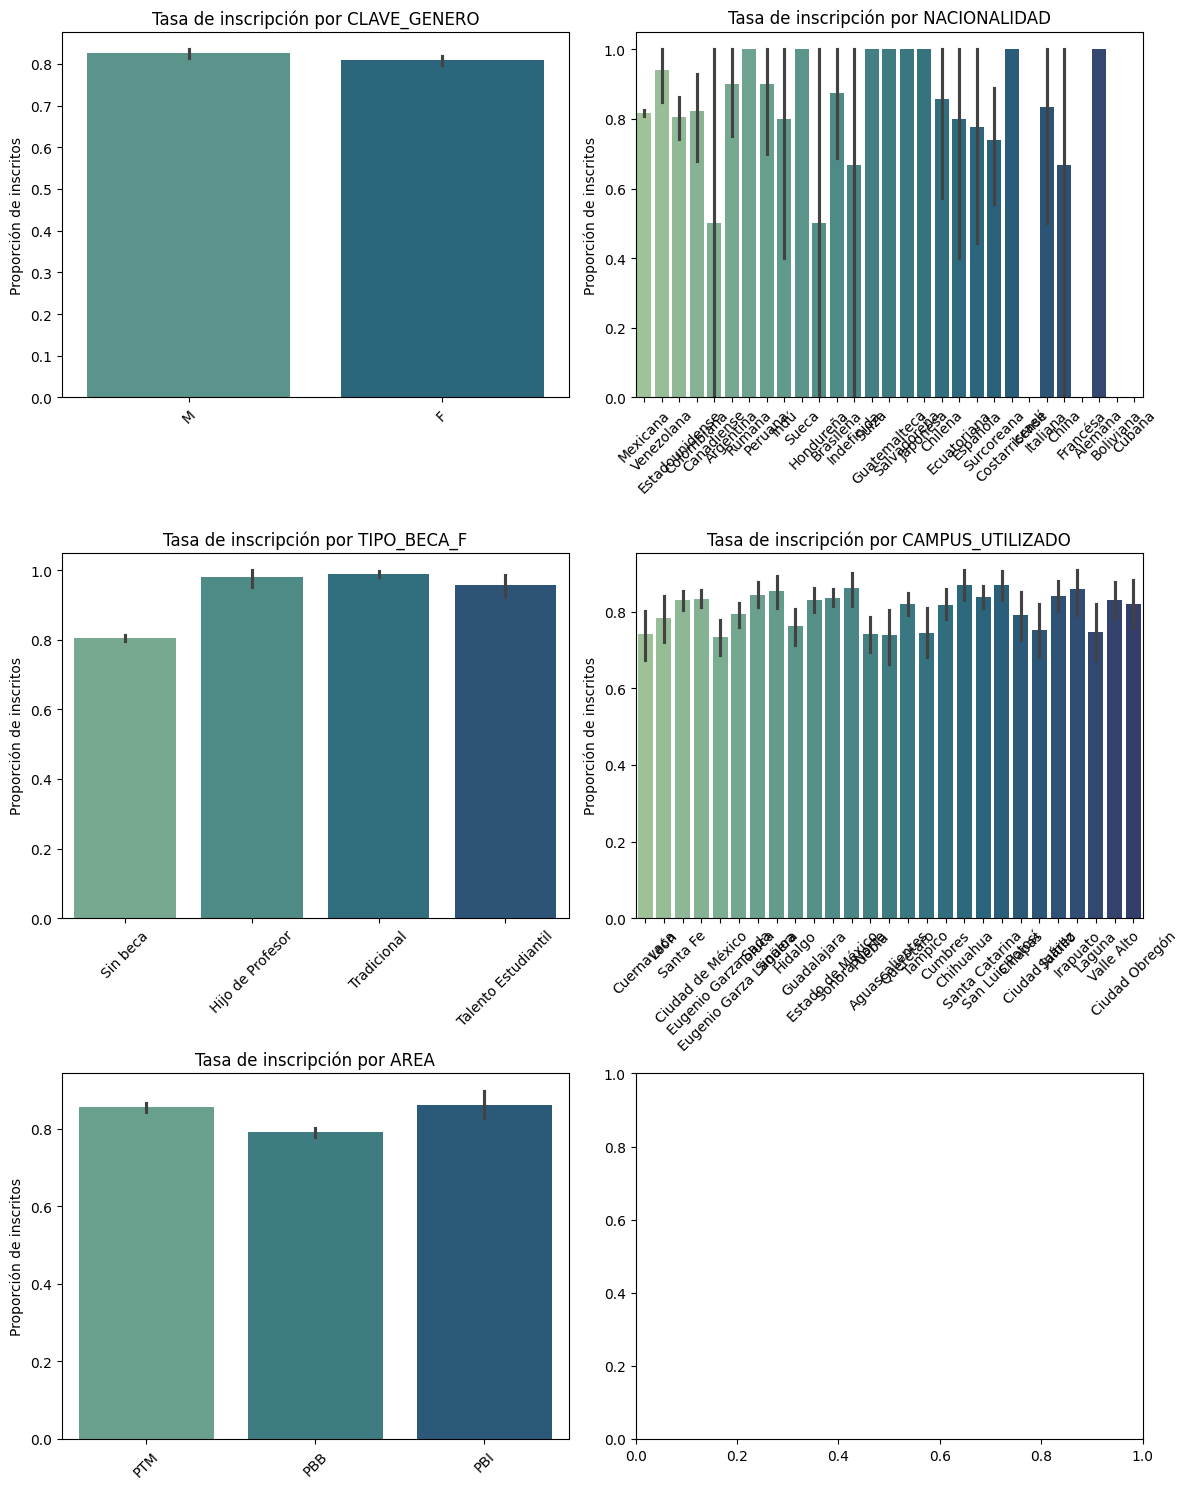

In [ ]:
# =====================
# 5. Análisis bivariado con variables categóricas (en grid)
# =====================
cat_cols = ['CLAVE_GENERO', 'NACIONALIDAD', 'TIPO_BECA_F', 'CAMPUS_UTILIZADO', 'AREA']

# Definir tamaño del grid
n = len(cat_cols)
cols = 2  # Número de columnas por fila (ajústalo a 2 o 3 según la cantidad)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if col in df.columns:
        sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
        axes[i].set_title(f"Tasa de inscripción por {col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Proporción de inscritos")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# ============================
# 1️⃣ Revisión rápida de valores extremos antes de limpiar
# ============================
num_cols = ['V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV', 'EDAD', 'prcBeca_f', 'PRC_BECA_F']

print("Valores máximos antes de limpieza:")
print(df[num_cols].max().sort_values(ascending=False))
print("\nValores mínimos antes de limpieza:")
print(df[num_cols].min().sort_values())

Valores máximos antes de limpieza:
V_PAA_IND      1583.0
EDAD            124.0
RUBRICA         110.0
V_PROM_IND      100.0
PUNTAJE_EUC      50.0
ENSAYO           25.0
CV               25.0
prcBeca_f         0.9
PRC_BECA_F        0.9
dtype: float64

Valores mínimos antes de limpieza:
V_PROM_IND      0.0
V_PAA_IND       0.0
ENSAYO          0.0
CV              0.0
prcBeca_f       0.0
PRC_BECA_F      0.0
PUNTAJE_EUC     2.0
RUBRICA        10.0
EDAD           13.0
dtype: float64


In [ ]:
# 1️⃣ Filtros de rango lógico
df = df[(df['EDAD'] >= 14) & (df['EDAD'] <= 20)]
df = df[(df['V_PAA_IND'] >= 400) & (df['V_PAA_IND'] <= 1600)]
df = df[(df['V_PROM_IND'] >= 60) & (df['V_PROM_IND'] <= 100)]
df = df[(df['RUBRICA'] >= 10) & (df['RUBRICA'] <= 110)]
df = df[(df['PUNTAJE_EUC'] >= 0) & (df['PUNTAJE_EUC'] <= 50)]
df = df[(df['prcBeca_f'] >= 0) & (df['prcBeca_f'] <= 1)]
df = df[(df['PRC_BECA_F'] >= 0) & (df['PRC_BECA_F'] <= 1)]

# 2️⃣ Percentil clipping suave (solo para variables con sesgo alto)
for col in ['ENSAYO', 'CV']:
    if col in df.columns:
        lower, upper = df[col].quantile([0.01, 0.99])
        df[col] = np.clip(df[col], lower, upper)

# 3️⃣ Verificación posterior
print("Filas restantes después de limpiar:", len(df))
print("\nMáximos y mínimos después de limpieza:")
print(df[['V_PAA_IND','V_PROM_IND','RUBRICA','PUNTAJE_EUC','EDAD','ENSAYO','CV']].agg(['min','max']).T)


Filas restantes después de limpiar: 9546

Máximos y mínimos después de limpieza:
               min     max
V_PAA_IND    751.0  1583.0
V_PROM_IND    75.0   100.0
RUBRICA       10.0   110.0
PUNTAJE_EUC    2.0    50.0
EDAD          14.0    18.0
ENSAYO         3.0    25.0
CV            10.0    25.0


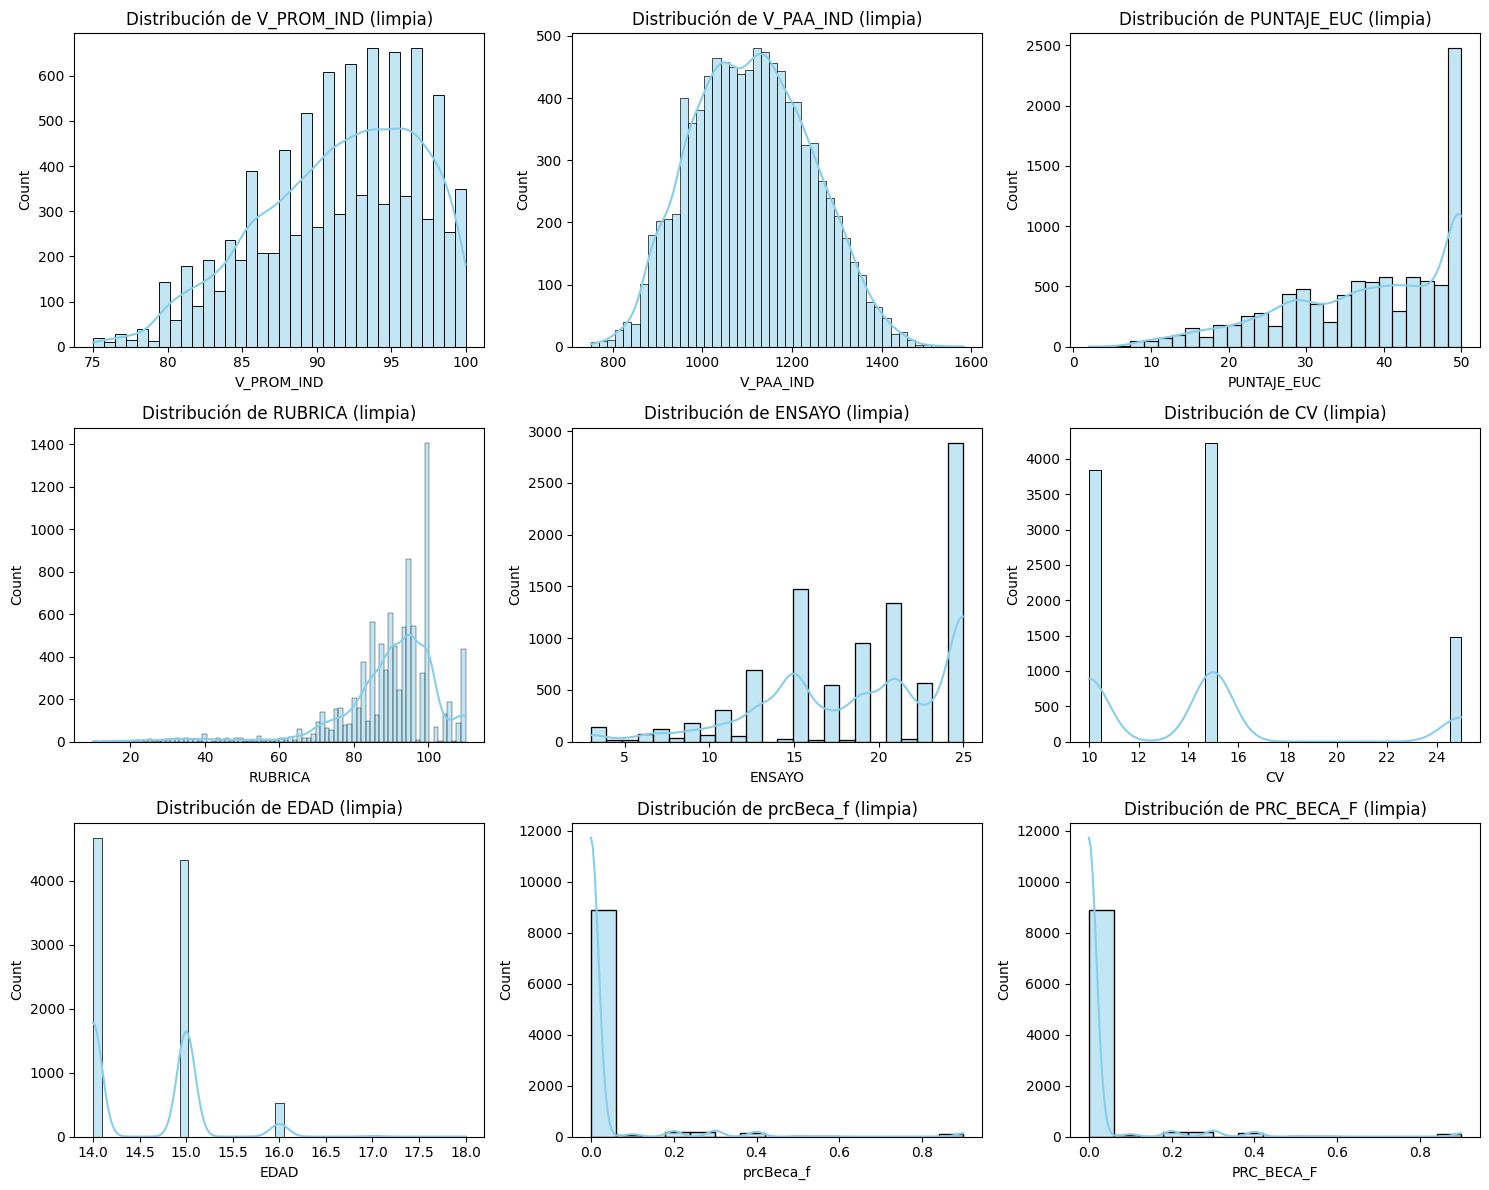

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = ['V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV', 'EDAD', 'prcBeca_f', 'PRC_BECA_F']

# --- Grid para histogramas limpios ---
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribución de {col} (limpia)")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## 🧩 Conclusión del Análisis Exploratorio de Datos (EDA) — Grupo Prepa Tec (Admitidos)

El conjunto de datos, compuesto por **9,546 registros y 45 variables**, fue depurado de valores nulos, columnas constantes y outliers extremos.  
Tras la limpieza, no se identificaron patrones sistemáticos de ausencia ni inconsistencias en las variables numéricas o categóricas.

En términos descriptivos, los aspirantes admitidos muestran **promedios académicos altos** (`V_PROM_IND` ≈ 91) y **puntajes PAA sólidos** (~1,090), con edades entre **14 y 18 años**.  
La mayoría de los estudiantes **no cuentan con beca** (≈95%), lo que genera distribuciones sesgadas hacia cero en variables financieras.  
Las distribuciones de desempeño (`ENSAYO`, `RUBRICA`, `CV`) presentan sesgos positivos, por lo que se recomienda escalar o normalizar antes del modelado.

No se identifican **tendencias temporales**, ya que el periodo corresponde únicamente a una admisión (`AD24`).  
Las correlaciones entre variables numéricas y la variable objetivo `INSCRITO` son **débiles** (|r| < 0.2), lo que sugiere un fenómeno **multifactorial**: la inscripción depende de la combinación de varios factores, más que de una sola variable.

En el análisis bivariado, se observan **diferencias significativas por campus y tipo de beca**, mientras que el género y el área académica presentan variaciones menores.  
Existe un **leve desequilibrio de clases** en la variable `INSCRITO` (~70% inscritos, 30% no inscritos), que podría abordarse mediante técnicas de balanceo o ponderación en el modelo.

**En síntesis:**  
El dataset está limpio, balanceado y listo para la fase de modelado.  
Las variables más prometedoras para explicar la atracción e inscripción son:  
`V_PROM_IND`, `V_PAA_IND`, `TIPO_BECA_F`, `CAMPUS_UTILIZADO` y `EDAD`.